In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Part I

In [2]:
# Import data
vio = pd.read_csv('data/violation_data_count_fines_severity.csv')
vio.head(20)

,cap_id,initial_violations,total_fine,1_day_violations,30_day_violations,other_violations
0,-19UNIT-INS-001854,2,2594,1,1,0
1,18ENF-HOUS-00046,7,4172,2,5,0
2,18ENF-HOUS-00050,8,5189,3,5,0
3,18ENF-HOUS-00051,12,10783,6,6,0
4,18ENF-HOUS-00053,2,1018,1,1,0
5,18ENF-HOUS-00054,4,2544,0,4,0
6,18ENF-HOUS-00055,2,611,0,2,0
7,18ENF-HOUS-00056,4,2137,0,4,0
8,18ENF-HOUS-00057,18,15870,8,10,0
9,18ENF-HOUS-00073,4,4069,1,3,0


In [4]:
# Assess missing data
vio.isnull().sum()

cap_id                0
initial_violations    0
total_fine            0
1_day_violations      0
30_day_violations     0
other_violations      0
dtype: int64

In [5]:
# Descriptive statistics
vio.describe()

,initial_violations,total_fine,1_day_violations,30_day_violations,other_violations
count,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000
mean,4.309288,3138.388310,1.035522,3.233960,0.039805
std,3.772816,2844.322545,1.360950,3.428206,0.202681
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1018.000000,0.000000,1.000000,0.000000
50%,3.000000,2200.000000,1.000000,2.000000,0.000000
75%,6.000000,4213.250000,2.000000,4.000000,0.000000
max,44.000000,33821.000000,18.000000,39.000000,3.000000


By looking at the dataset, we notice that for each row, initial_violations = 1_day_violations + 30_day_violations + other_violations

In general, the number of caps with 30 day violations > 1 day violations.

In [18]:
# Order by total_fine
vio = vio.sort_values(by='total_fine', ascending=False)
vio.head(10)

,cap_id,initial_violations,total_fine,1_day_violations,30_day_violations,other_violations
3127,19ENF-HOUS-02523,24,33821,18,6,0
3365,19ENF-HOUS-03081,34,26352,5,29,0
6874,CNU1800546,26,25024,9,17,0
6328,CIN1700296,44,24900,5,39,0
4473,19ENF-HOUS-05646,20,20853,9,11,0
724,18ENF-HOUS-01741,17,20851,10,7,0
4573,19ENF-HOUS-05889,19,20749,9,10,0
8503,CRM1703103,33,20700,3,30,0
9618,CRM1801396,20,20446,8,12,0
9898,CRM1802030,20,20343,11,9,0


In [25]:
# other_violations > 0
vio_oth = vio[vio['other_violations']>0].sort_values(by = 'total_fine', ascending=False)

In [24]:
vio_oth.describe()

,initial_violations,total_fine,1_day_violations,30_day_violations,other_violations
count,460.000000,460.000000,460.000000,460.000000,460.000000
mean,4.693478,3178.684783,0.404348,3.258696,1.030435
std,3.293150,2403.436391,0.846357,2.907512,0.206506
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1500.000000,0.000000,1.000000,1.000000
50%,4.000000,2500.000000,0.000000,3.000000,1.000000
75%,6.000000,4100.000000,1.000000,5.000000,1.000000
max,19.000000,19936.000000,7.000000,15.000000,3.000000


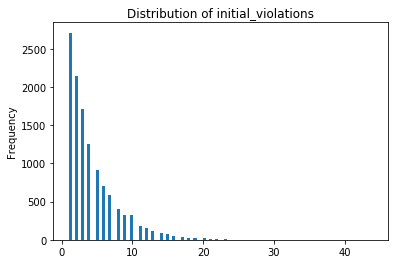

In [27]:
# Visualize the distribution of initial_violations, 1_day_violations, 30_day_violations
vio['initial_violations'].plot.hist(bins=100, title = 'Distribution of initial_violations')

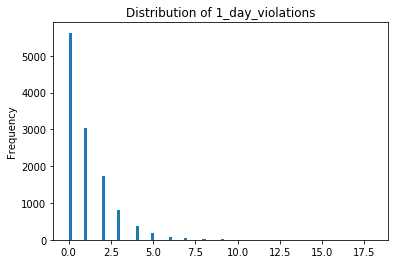

In [26]:
vio['1_day_violations'].plot.hist(bins=100, title = 'Distribution of 1_day_violations',)

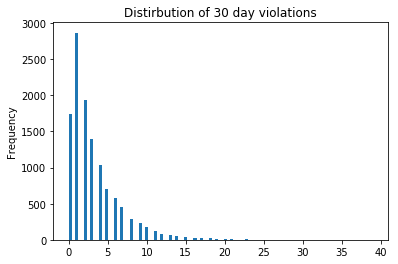

In [37]:
vio['30_day_violations'].plot.hist(bins=100, title = 'Distirbution of 30 day violations')

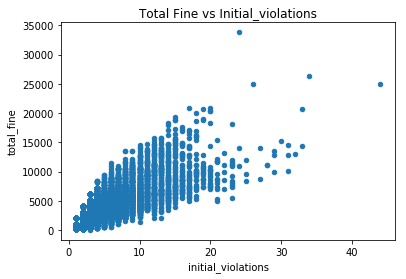

In [23]:
# total fine vs initial_violations
vio.plot(title = 'Total Fine vs Initial_violations',
        kind = "scatter",
        x = 'initial_violations',
        y = 'total_fine')
# the more initial_violations, the higher total fine

## Brainstorming
Variables to include: 
complaint_confidential from complaint dataset, cap_status from proactive_inspections, status from residential_licenses...


Possible analysis: using comments from complaint dataset to fit a topic model.

Easy to implement : text analysis using complaint_confidential columns

hard to implement : proactive, may need merge variables from different datasets
Impact: for DCRA officials easier to target the area where comments suggest worst violations

## Text Analysis

In [31]:
# import  the dataset
com = pd.read_csv('data/complaint_inspections.csv')

In [32]:
com.head()

,As_Of_Date,CAP_CreateDate,CAP_ID,CAP_STATUS,CAP_STATUS_DATE,CAP_ALIAS,CAP_CREATED_BY_confidential,G6_Unique_ID,R3_BUREAU_CODE,Schedule_Date,...,Anc,crm_id,inspector_group,Inspector_Full_Name_confidential,status_des,inspection_type,complaint_confidential,square,lot,address_id
0,2019-08-11 19:45:05.167,2018-08-20 00:00:00.000,18ENF-HOUS-02209,NOI Created,07/23/2019,Housing Enforcement Case,0x5BB4B55D9AF6F46A6FAA7CA6F9D3567B,1802678,INSPECT,2018-09-18 00:00:00.000,...,ANC 6D,NaN,Housing,0x81578F39291A10876E9743C84900B1BE,Completed,Initial,RUST ON WALLS AND STEPS ON 8TH FLOOR OF BUILDI...,0540,847,277853
1,2019-08-11 19:45:05.167,2018-08-20 00:00:00.000,18ENF-HOUS-02209,NOI Created,07/23/2019,Housing Enforcement Case,0x5BB4B55D9AF6F46A6FAA7CA6F9D3567B,1833072,INSPECT,2018-12-04 00:00:00.000,...,ANC 6D,NaN,Housing,0x81578F39291A10876E9743C84900B1BE,Completed,Re-Inspection,RUST ON WALLS AND STEPS ON 8TH FLOOR OF BUILDI...,0540,847,277853
2,2019-08-11 19:45:05.167,2019-05-07 00:00:00.000,19ENF-HOUS-03456,Final No Access,06/07/2019,Housing Enforcement Case,0x5F49429733471C43720677D7B9B2D6E8,1935535,INSPECT,2019-06-07 00:00:00.000,...,ANC 8B,NaN,Housing,0x579DBE3036078C6198477E2E6B10C011,Completed,Initial,NaN,5873,921,296110
3,2019-08-11 19:45:05.167,2018-12-31 00:00:00.000,19ENF-HOUS-01733,No Violation,12/31/2018,Housing Enforcement Case,0x5EDD979FC81707144E9A6D63C6910205,1871960,INSPECT,2018-12-28 00:00:00.000,...,ANC 6D,NaN,Housing,0x8E835A252483CBD886D355C3E2706C55,Completed,Initial,NaN,0737,827,310937
4,2019-08-11 19:45:05.167,2012-05-08 00:00:00.000,CRM1201303,Inspection Scheduled,10/01/2015,Enforce/Compliance/Housing/Routine Maintenance,0x2842EAED7932D9111737FD9857EEF58A,1612074,INSPECT,2017-05-23 00:00:00.000,...,ANC 7A,NaN,ENF,0xFD345216049AF8D2396D73FBCF7070A9,Completed,Re-Inspection,carport has collapsed,5546,807,43059


In [34]:
# 1. Limit to initial inspections
data = com[com['inspection_type'] == 'Initial']

In [35]:
data.head()

,As_Of_Date,CAP_CreateDate,CAP_ID,CAP_STATUS,CAP_STATUS_DATE,CAP_ALIAS,CAP_CREATED_BY_confidential,G6_Unique_ID,R3_BUREAU_CODE,Schedule_Date,...,Anc,crm_id,inspector_group,Inspector_Full_Name_confidential,status_des,inspection_type,complaint_confidential,square,lot,address_id
0,2019-08-11 19:45:05.167,2018-08-20 00:00:00.000,18ENF-HOUS-02209,NOI Created,07/23/2019,Housing Enforcement Case,0x5BB4B55D9AF6F46A6FAA7CA6F9D3567B,1802678,INSPECT,2018-09-18 00:00:00.000,...,ANC 6D,NaN,Housing,0x81578F39291A10876E9743C84900B1BE,Completed,Initial,RUST ON WALLS AND STEPS ON 8TH FLOOR OF BUILDI...,0540,847,277853
2,2019-08-11 19:45:05.167,2019-05-07 00:00:00.000,19ENF-HOUS-03456,Final No Access,06/07/2019,Housing Enforcement Case,0x5F49429733471C43720677D7B9B2D6E8,1935535,INSPECT,2019-06-07 00:00:00.000,...,ANC 8B,NaN,Housing,0x579DBE3036078C6198477E2E6B10C011,Completed,Initial,NaN,5873,921,296110
3,2019-08-11 19:45:05.167,2018-12-31 00:00:00.000,19ENF-HOUS-01733,No Violation,12/31/2018,Housing Enforcement Case,0x5EDD979FC81707144E9A6D63C6910205,1871960,INSPECT,2018-12-28 00:00:00.000,...,ANC 6D,NaN,Housing,0x8E835A252483CBD886D355C3E2706C55,Completed,Initial,NaN,0737,827,310937
5,2019-08-11 19:45:05.167,2018-12-31 00:00:00.000,19ENF-HOUS-01734,No Violation,12/31/2018,Housing Enforcement Case,0x5EDD979FC81707144E9A6D63C6910205,1871961,INSPECT,2018-12-28 00:00:00.000,...,ANC 6D,NaN,Housing,0x8E835A252483CBD886D355C3E2706C55,Completed,Initial,NaN,0737,77,309404
6,2019-08-11 19:45:05.167,2018-12-31 00:00:00.000,19ENF-HOUS-01735,No Violation,12/31/2018,Housing Enforcement Case,0x5EDD979FC81707144E9A6D63C6910205,1871962,INSPECT,2018-12-28 00:00:00.000,...,ANC 6D,NaN,Housing,0x8E835A252483CBD886D355C3E2706C55,Completed,Initial,NaN,0499,62,306776


In [36]:
# Number of observations
len(data)

13886

In [39]:
# 2. Convert complaint field into list
complaints = []
for complaint in data['complaint_confidential']:
    complaints.append(complaint)

In [57]:
complaints = [i for i in complaints if str(i) != 'nan']

In [58]:
complaints

['RUST ON WALLS AND STEPS ON 8TH FLOOR OF BUILDING WITH WATER DAMAGE COMMON AREA ALSO PEELING PAINT \r\nMANAGEMENT: CAPITOL PARK TOWERS\r\n202-479-3900 MR. TOM COLE\r\nANONY. CALLER',
 'CAP created per Inspector Taylor\r\nExterior Violation\r\n\r\nPlease contact Ms. Vivian Person 202 575-4088',
 'cracks on the outside of window foundation, causing condensation in the inside of unit \r\nTenant: DAMON LAWRENCE  617-653-5155 APT.  3\r\nCUSTOMER WILL CALL BACK WITH PHONE NUMBER FOR LANDLORD',
 'Neighbor report that the rear of the house is in disrepair',
 'Tenant: Ms. Jamaya Dent-202-567-8488 #201\r\nLandlord: Rental Office-202-391-6636\r\n\r\nWater leaking in both bathroom',
 'Tenant: Holly Barzyk 443-690-7870 #2\r\nProperty Management: Walde Management \r\n\r\nTenant complained of rodents',
 'Tenant: Nidra Weir 202 889-0813Unit T-1\r\nOwner: Edgewood Management (202) 678-5800 Ms. Sharon Maintenance Supervisor\r\n\r\nTenant called in a work order on 7/12/16 Management stated that the work

In [61]:
# 3. Create a document-term matrix weighted by TFIDF
vectorizer = CountVectorizer(min_df = 0.005, stop_words='english')
X = vectorizer.fit_transform(data)

In [62]:
transformer = TfidfTransformer()
X1 = transformer.fit_transform(X)

In [65]:
X1.shape

(43, 43)

In [ ]:
# 4. challenges
# There are a lot of abbreviations which we may not the meanings for.